In [1]:
import pandas as pd
import numpy as np
import time
import math

from Bio.KEGG.REST import kegg_info
from Bio.KEGG.REST import kegg_list
from Bio.KEGG.REST import kegg_link

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

## Input data

In [2]:
dffig_pathway = pd.read_csv('Data/dffig_pathway', index_col=0, header=0, sep='\t')
dffig_ko = pd.read_csv('Data/dffig_ko', index_col=0, header=0, sep='\t')

In [3]:
ko_list =['K03553','K04079','K04043','K03695', 'K03694', 'K03544','K04077','K02945','K02112']
genelist =['$\it{recA}$','$\it{htpG}$','$\it{dnaK}$','$\it{clpB}$', '$\it{clpA}$', '$\it{clpX}$','$\it{groEL}$','$\it{rpsA}$','$\it{atpD}$']

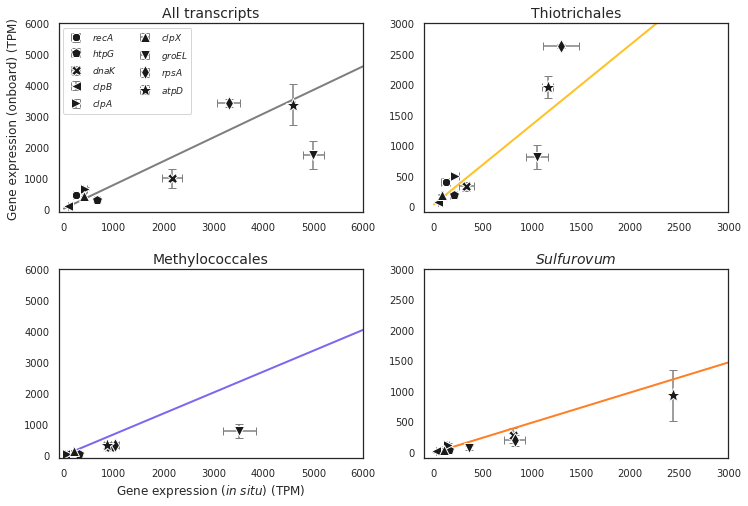

In [4]:
dffig_ko.replace('Sulfurovum', '$\it{Sulfurovum}$', inplace=True)

figures = ['All transcripts', 'Thiotrichales', 'Methylococcales', '$\it{Sulfurovum}$']
col = ['black', '#7b68ee', '#ff7f24', '#ffc125']

sns.set()
sns.set_style('white')

genemarker=["8","p","X", "<",">","^","v",'d',"*"]
sizemarker=[8,10,10,10,10,10,10,10,14]


gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(12, 8))
fig_num1 = [0,0,1,1]
fig_num2 = [0,1,0,1]

max_axis = [6000, 3000, 6000, 3000]
xp = np.linspace(1, 100000, 100)

reg_col = ['#7e7e7e','#ffc125', '#7b68ee', '#ff7f24','c']

for i in range(len(figures)):
    ax = plt.subplot(gs[fig_num1[i], fig_num2[i]])
    df_taxa = dffig_ko[dffig_ko['taxa'] == figures[i]]
    
    if i ==0:
        for j in range(len(ko_list)):
            gene = df_taxa[df_taxa.index == ko_list[j]]

            ax.errorbar(gene['insitu_ave'], gene['onboard_ave'], xerr=gene['insitu_range'] , yerr=gene['onboard_range'], 
                        fmt='o', ecolor='grey', capsize=4, MarkerSize=sizemarker[j], 
                        marker=genemarker[j], 
                        MarkerFaceColor="k", 
                        MarkerEdgeColor='w', 
                        label=genelist[j])
        ax.legend(fontsize=9, ncol=2)
        ax.set_ylabel("Gene expression (onboard) (TPM)", fontsize=12)
            
    else:
        for j in range(len(ko_list)):
            gene = df_taxa[df_taxa.index == ko_list[j]]

            ax.errorbar(gene['insitu_ave'], gene['onboard_ave'], xerr=gene['insitu_range'] , yerr=gene['onboard_range'], 
                        fmt='o', ecolor='grey', capsize=4, MarkerSize=sizemarker[j], 
                        marker=genemarker[j], 
                        MarkerFaceColor="k", 
                        MarkerEdgeColor='w', 
                        label='')

    # Regression line
    df_taxa = dffig_ko[dffig_ko['taxa'] == figures[i]]
    x = np.array(df_taxa['insitu_ave'])
    y = np.array(df_taxa['onboard_ave'])
    xp = np.linspace(1, max(y), 100)
    yreg1 = np.poly1d(np.polyfit(x, y, 1))

    ax.plot(xp, yreg1(xp), label='', linewidth=2, color=reg_col[i])

    ax.set_title(figures[i], fontsize=14)
    ax.tick_params(labelsize=10)

    ax.set_xlim(-100, max_axis[i])
    ax.set_ylim(-100, max_axis[i])

    if i == 2:
        ax.set_xlabel('Gene expression ($\it{in}$ $\it{situ}$) (TPM)', fontsize=12)
        
plt.subplots_adjust(hspace=0.3)
fig.savefig('Figures/Fig6.pdf', bbox_inches='tight')

plt.show()